## Collaborative Filtering 

- Item Based 
    - Explicit Rating
    - Implicit Rating
- User Based
    - Explicit Rating
    - Implicit Rating

- Converting Collaborative Filtering into Optimization Problem
    - Metrics : 
      - Error : MSE , MAE
      - Accuracy : Precision / Recall  
      - Ranking : AUC / MAP at K 
    - SLIM

In [177]:
import pandas as pd 
import numpy as np 
from numpy.linalg import norm
from scipy.spatial.distance import pdist,squareform

def cosine_similarities(a,b) : 
    norm_a = np.sqrt(np.dot(a,a))
    norm_b = np.sqrt(np.dot(b,b))
    cosine_similarities = np.dot(a,b) / np.dot(norm_a,norm_b)
    return cosine_similarities

### Converting Collaborative Filtering into Optimization Problem

For More Structured Term , we will Learning Theory Setup From Yasser Abu Mustafa

- Input and Output Pair -> History of Ratings 
- True Function -> Unknown 
- Hypothesis Function 
- Optimization 
  - Problem : Minimization 
  - Objective : Minimize Error 
  - Optimization Algorithm -> Gradient Descent/ ALS/ SVD, etc
- Best Candidate

### User Based Collaborative Filtering

### Implicit Rating

In [123]:
## Vectorized Way
#create random user rating matrix with 2 users and 3 items
user_rating_matrix = np.random.randint(2,size=(2,5))
print('URM',user_rating_matrix)
user_1 = user_rating_matrix[0]
print('User 1',user_1)
user_2 = user_rating_matrix[1]
print('User 2',user_2)

## calculate similarity between user 1 and 2 
sim = cosine_similarities(user_1,user_2)
print('Cosine Similarity User 1 & 2',sim)

URM [[0 0 1 1 1]
 [0 1 0 0 1]]
User 1 [0 0 1 1 1]
User 2 [0 1 0 0 1]
Cosine Similarity User 1 & 2 0.40824829046386296


In [124]:
from scipy import spatial

result = 1 - spatial.distance.cosine(user_1,user_2)
result

0.40824829046386313

In [125]:
# Non Vectorized way
n_item = 5
nominator = 0 
denominator = 0 
user_1_r2 = 0
user_2_r2 = 0
for item_idx in range(n_item) : 
    user_1_rating = user_rating_matrix[0][item_idx]
    print(f'Rating of User 1 at idx : {item_idx},user_1_rating',user_1_rating)
    user_2_rating = user_rating_matrix[1][item_idx]
    print(f'Rating of User 2 at idx : {item_idx},user_2_rating',user_2_rating)
    nominator += user_1_rating*user_2_rating
    user_1_r2 += np.power(user_1_rating,2)
    user_2_r2 += np.power(user_2_rating,2)
print('1',user_1_r2)
print('2',user_2_r2)
similarity_1_2 = nominator / (np.sqrt(user_1_r2*user_2_r2))
similarity_1_2

Rating of User 1 at idx : 0,user_1_rating 0
Rating of User 2 at idx : 0,user_2_rating 0
Rating of User 1 at idx : 1,user_1_rating 0
Rating of User 2 at idx : 1,user_2_rating 1
Rating of User 1 at idx : 2,user_1_rating 1
Rating of User 2 at idx : 2,user_2_rating 0
Rating of User 1 at idx : 3,user_1_rating 1
Rating of User 2 at idx : 3,user_2_rating 0
Rating of User 1 at idx : 4,user_1_rating 1
Rating of User 2 at idx : 4,user_2_rating 1
1 3
2 2


0.4082482904638631

In [127]:
#calculate estimated ratings 
i = 2

# let say we want to compute the rating from user u with the item 1, givem the fact that user v has rated it 

r_hat_ui = user_2[i] * cosine_similarities(user_1,user_2)
r_hat_ui

#Calculate Difference 
user_1[i]



1

### User Based Neighbouring Collaborative Filtering



Predicting Ratings

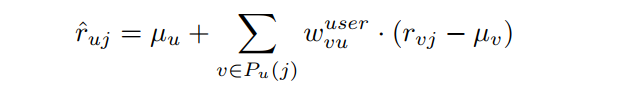

In [190]:
user_rating_matrix[user_to_predict][item_to_predict]

2

In [191]:
n_items = 10 
n_users = 10 
user_to_predict = 0 
item_to_predict = 9 
user_rating_matrix = np.random.randint(5,size=(n_users,n_items))

#creating user similarities matrix 
user_similarities = squareform(pdist(user_rating_matrix, metric='cosine'))
user_similarities


#predict user 1 rating to item 10 
avg_rating = np.mean(user_rating_matrix[0])
avg_rating


# get 5 most similar user 
user_to_predict
user_5_idx = user_similarities[user_to_predict].argsort()[-5:][::-1]


#iterate over user_5_idx 
user_0_ratings_on_item_10 = 0 

#for dividing the similarities 
total_similarities = 0 
for idx in user_5_idx : 
    user_u = user_rating_matrix[0]
    user_v = user_rating_matrix[idx]
    similarities_u_v = cosine_similarities(user_u,user_v)
    total_similarities+=similarities_u_v
    #get user_v average ratings 
    user_v_avg_rating = np.mean(user_v)
    
    #get user_v ratings on item_to_predict 
    r_v_item = user_v[item_to_predict]
    
    #substract mean from user_v rating on item to predict 
    r_user_v_adjusted = r_v_item - user_v_avg_rating
    
    user_0_ratings_on_item_10 += similarities_u_v * r_user_v_adjusted
print(f'User 1 Ratings on Item 10, Predicted :{user_0_ratings_on_item_10/total_similarities}, Actual {user_rating_matrix[user_to_predict][item_to_predict]}')


User 1 Ratings on Item 10, Predicted :0.19336426160588588, Actual 1


### Item Based Collaborative Filtering

In [132]:
# Explicit Ratings 
#first create user rating_matrix
n_users= 10 
n_items = 10 
user_rating_matrix = np.random.randint(10,size=(n_users,n_items))




#item_similarity , row represent user and column represent items 
# to calculte similarity 
user_rating_matrix_pivoted = user_rating_matrix.T


# for example we want to calculate the similarity between item 2 and 5 
item_3 = user_rating_matrix_pivoted[2]
item_5 = user_rating_matrix_pivoted[4]


cosine_similarities(item_3,item_5)







0.7175718130416573

In [149]:

item_idx_to_find_ratings = 0 
item_similarity = squareform(pdist(user_rating_matrix_pivoted, metric='cosine'))
item_similarity

pd.DataFrame(item_similarity)


#let say we will query 5 similar neighbour items 
similar_5_idx = item_similarity[item_idx_to_find_ratings].argsort()[-5:][::-1]





 Predicting Ratings Based on the K Neighbour
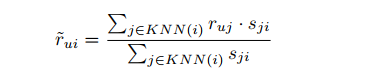

In [154]:
#now we want to infer the ratings of item 0 from user 5 
user_5 = user_rating_matrix[4]
nominator = 0 
denominator = 0 
for item_idx in similar_5_idx : 
    #find rating of item_idx in 
    rating_user_5_on_item_idx = user_5[item_idx]
    #calculate_similarity between item_idx with item 0 
    item_0_vector = user_rating_matrix_pivoted[0]
    item_idx_vector = user_rating_matrix_pivoted[0]
    similarity = cosine_similarities(item_0_vector,item_idx_vector)
    nominator += rating_user_5_on_item_idx*similarity
    denominator += similarity


predicted_ratings = nominator/ denominator
predicted_ratings

true_rating = user_5[0]

print(f'True Rating :  {true_rating} and Predicted Ratings  : {predicted_ratings}')

True Rating :  1 and Predicted Ratings  : 5.0


## SLIM Implementation

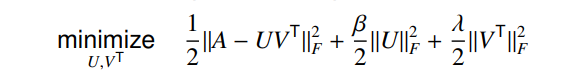

In [171]:
from scipy.sparse import lil_matrix
l1_reg=0.001
l2_reg=0.0001
from sklearn.linear_model import SGDRegressor
alpha = l1_reg + l2_reg
model = SGDRegressor(
    penalty='elasticnet',
    fit_intercept=False,
    alpha=alpha,
    l1_ratio=l1_reg,
)

In [172]:
n_users = 100 
n_items = 20
# A denoted as user rating matrix towards an item 
A = np.random.randint(10,size=(n_users,n_items))


W = np.zeros(shape=(n_items, n_items))

for j in range(n_items):
    aj = A[:, j].copy()
    # We need to remove the column j before training
    #remove column j and convert as a target 
    A[:, j] = 0
    #fit A as feature (X) with removed j , Y (rating predicted)
    model.fit(A, aj.ravel())
    # We need to reinstate the matrix
    A[:, j] = aj

    w = model.coef_

    
    w[w < 0] = 0

    for el in w.nonzero()[0]:
        W[(el, j)] = w[el]


In [173]:
# let say we want to predict user 1 item then we multiply each coefficient in W in row 1 to its rating 
user_1 = A[0]
rating = 0 
for j_el in user_1 : 
    r_user_0_el = user_1[j_el]
    #get the weight 
    weight = W[0][j_el]
    rating += weight* r_user_0_el
rating

4.715353079377602

In [175]:
W

array([[0.00000000e+00, 9.47006602e-02, 7.65076246e-02, 5.11443300e-02,
        1.18727820e-01, 2.72367344e-02, 9.84660546e-02, 1.50103021e-01,
        0.00000000e+00, 1.52284565e-01, 8.45334951e-02, 7.30251182e-02,
        0.00000000e+00, 0.00000000e+00, 5.47922224e-02, 9.00003929e-02,
        0.00000000e+00, 0.00000000e+00, 5.36299112e-02, 9.94288852e-02],
       [9.74560591e-02, 0.00000000e+00, 0.00000000e+00, 8.22254449e-02,
        5.12877832e-02, 9.42891557e-02, 5.51197087e-02, 0.00000000e+00,
        6.04020239e-02, 1.86671688e-02, 2.29914182e-01, 5.65915405e-02,
        8.25559366e-02, 0.00000000e+00, 6.20278939e-02, 1.14916706e-01,
        1.28799092e-01, 1.48364948e-01, 3.37461448e-02, 5.87554974e-02],
       [1.18865434e-01, 0.00000000e+00, 0.00000000e+00, 9.48467124e-02,
        4.10155112e-02, 2.52175837e-02, 8.52385030e-02, 0.00000000e+00,
        5.42218309e-02, 1.38517435e-01, 8.85820007e-02, 4.77204331e-02,
        2.15455195e-01, 0.00000000e+00, 1.47338181e-01, 2.6736

In [ ]:
#implement SLIM algorithm from scratch